In [22]:
import pandas as pd
import skimage as img
import tqdm
from matplotlib import pyplot as plt

In [23]:
# Load the dataset
stare_diagnoses = pd.read_csv("../data/STARE/diagnoses.csv")
stare_images = []

for i in tqdm.tqdm(range(len(stare_diagnoses))):
    stare_images.append(img.io.imread("../data/STARE/images/" + stare_diagnoses["ID"][i] + ".ppm"))

100%|██████████| 397/397 [00:01<00:00, 204.08it/s]


In [24]:
# Print the first 5 rows of the diagnoses dataframe
print(stare_diagnoses.head())
print(stare_diagnoses.shape)

       ID  Normal  Emboli  BRAO  CRAO  BRVO  CRVO  Hemi-CRVO  BDR/NPDR  PDR  \
0  im0001       0       0     0     0     0     0          0         1    0   
1  im0002       0       0     0     0     0     0          0         0    0   
2  im0003       0       0     0     0     0     0          0         0    0   
3  im0004       0       0     0     1     0     0          0         0    0   
4  im0005       0       0     0     1     0     1          0         0    0   

   ASR  HTR  Coats  Macroaneurism  CNV  Other  
0    0    0      0              0    0      0  
1    1    0      0              0    1      0  
2    0    0      0              0    0      1  
3    0    0      0              0    0      1  
4    0    0      0              0    0      0  


In [25]:
# For each column in the diagnoses dataframe, print the number of unique values
for col in stare_diagnoses.columns:
    print(col + ":", stare_diagnoses[col].value_counts()[1])

ID: 1
Normal: 39
Emboli: 13
BRAO: 7
CRAO: 9
BRVO: 11
CRVO: 25
Hemi-CRVO: 12
BDR/NPDR: 70
PDR: 23
ASR: 33
HTR: 36
Coats: 14
Macroaneurism: 8
CNV: 61
Other: 158


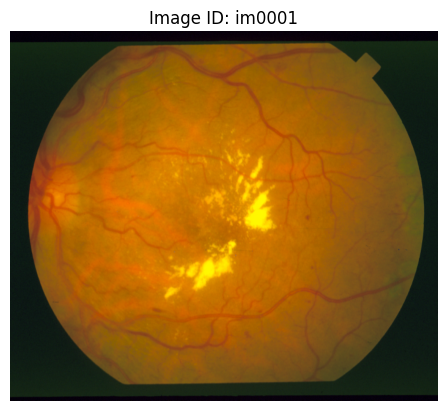

In [27]:
# Print the first image
plt.imshow(stare_images[0])
plt.title("Image ID: " + stare_diagnoses["ID"][0])
plt.axis("off")
plt.show()

In [29]:
# Split the dataset into training and testing data
train_diagnoses = stare_diagnoses.sample(frac=0.8, random_state=0)
test_diagnoses = stare_diagnoses.drop(train_diagnoses.index)

In [33]:
# Print the number of instances in the training and testing data.
print("Training instances:", train_diagnoses.shape[0])
print("Testing instances:", test_diagnoses.shape[0])

Training instances: 318
Testing instances: 79
